**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [43]:
# write your code here
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

Verify that $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$ with symbol Python

In [44]:
# write your code here
#Define the symbols
C = sm.symbols('C')
G = sm.symbols('G')
L = sm.symbols('L')
w = sm.symbols('w')
w_tilde = sm.symbols('wtilde')
alpha = sm.symbols('alpha')
kappa = sm.symbols('kappa')
nu = sm.symbols('nu')
omega = sm.symbols('omega')
tau = sm.symbols('tau')

In [45]:
#Define the utility function
objective = sm.ln(C**alpha*G**(1-alpha))-nu*L**2/2
objective

-L**2*nu/2 + log(C**alpha*G**(1 - alpha))

In [46]:
budget_constraint = kappa+(1-tau)*w*L
budget_constraint

L*w*(1 - tau) + kappa

In [47]:
objective_subs = objective.subs(C,budget_constraint)
objective_subs

-L**2*nu/2 + log(G**(1 - alpha)*(L*w*(1 - tau) + kappa)**alpha)

In [48]:
objective_subs_2 = objective_subs.subs(w*(1-tau),w_tilde)
objective_subs_2

-L**2*nu/2 + log(G**(1 - alpha)*(L*wtilde + kappa)**alpha)

In [49]:
foc = sm.diff(objective_subs_2, L)
foc

G**(1 - alpha)*G**(alpha - 1)*alpha*wtilde/(L*wtilde + kappa) - L*nu

In [50]:
sol = sm.solve(sm.Eq(foc,0), L)
sol[0]

(-kappa*nu - sqrt(nu*(4*alpha*wtilde**2 + kappa**2*nu)))/(2*nu*wtilde)

In [51]:
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
tau = 0.30
w = 1
G = 1.5
w_tilde = w*(1-tau)
w=1

Define the function numerically

In [52]:
def objective_function(L):
   C = kappa + (1 - tau) * w * L
   utility = np.log(C**alpha * G**(1 - alpha)) - nu * (L**2) / 2
   return -utility  # Negative sign for maximization




# Define the bounds for the variable L
bounds = [(0, 24)]

optimal_L = minimize(objective_function, x0=12, bounds=bounds).x[0]
print("Optimal hours of labor:", optimal_L)

Optimal hours of labor: 15.301203832018528


Find the optimal amount of labor in the Sympy model

In [53]:
# Define the function L_star
def L_star(w_tilde):
    return (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * w_tilde**2)) / (2 * w_tilde)
# w=1 =>w_tilde=0.7
L_star(0.7)

15.30165022719559

We find that the optimal hours of labor is 15.3 in the numerical and Sympy models

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

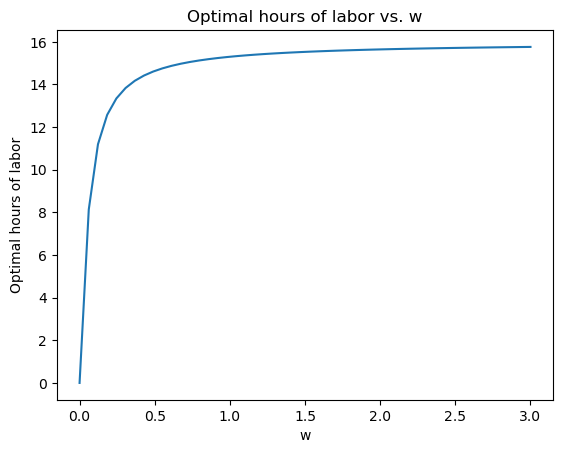

In [54]:

# Define the objective function with the budget constraint substituted in
def objective_function(L,w):
    C = kappa + (1 - tau) * w * L
    utility = np.log(C**alpha * G**(1 - alpha)) - nu * (L**2) / 2
    return -utility  # Negative sign for maximization


# Define the bounds for the variable L
bounds = [(0, 24)]
w_values = np.linspace(0, 3, 50)  # Generate 50 values of w from 1 to 5
optimal_L_values = []

# Loop over different values of w
for w in w_values:
    optimal_L = minimize(objective_function, x0=12, args=(w,), bounds=bounds).x[0]
    optimal_L_values.append(optimal_L)
# Plot the results
plt.plot(w_values, optimal_L_values)
plt.xlabel('w')
plt.ylabel('Optimal hours of labor')
plt.title('Optimal hours of labor vs. w')
plt.show()




We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


People consider government spending when working
As the agents gain from public consumption the amount of hours worked increase
$\alpha=0.5$ so agents doesn't prefer the consumption is from themselves or the government

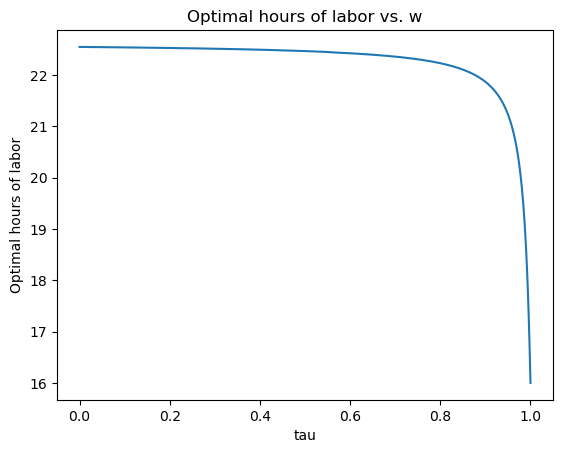

In [55]:
# Define the objective function with the budget constraint substituted in
def objective_function(L,tau):
    G = tau*w*L
    C = kappa + (1 - tau) * w * L
    utility = np.log(C**alpha * G**(1 - alpha)) - nu * (L**2) / 2
    return -utility  # Negative sign for maximization


# Define the bounds for the variable L
bounds = [(1e-12, 24)]
tau_values = np.linspace(1e-12, 1-1e-12, 1000)  # Generate 50 values of w from 1 to 5
optimal_L_values = []
optimal_G_values = []
optimal_utility_values = []
# Loop over different values of w
for tau in tau_values:
    solution = minimize(objective_function, x0=12, args=(tau,), bounds=bounds)
    optimal_L = solution.x[0]
    optimal_L_values.append(optimal_L)
    optimal_G = tau*w*optimal_L*((1-tau)*w)
    optimal_G_values.append(optimal_G)
    optimal_utility = -solution.fun
    optimal_utility_values.append(optimal_utility)
    
# Plot the results
plt.plot(tau_values, optimal_L_values)
plt.xlabel('tau')
plt.ylabel('Optimal hours of labor')
plt.title('Optimal hours of labor vs. w')
plt.show()

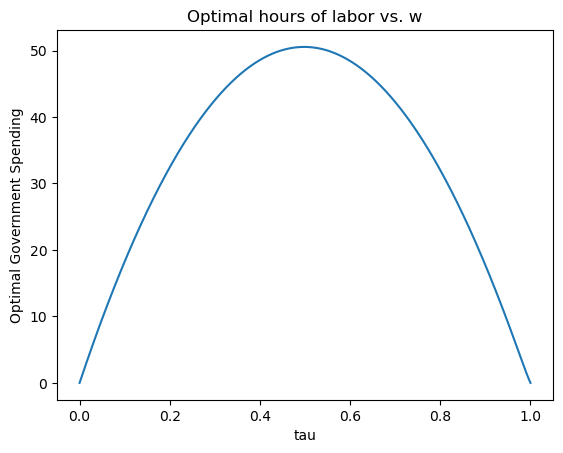

In [56]:
plt.plot(tau_values, optimal_G_values)
plt.xlabel('tau')
plt.ylabel('Optimal Government Spending')
plt.title('Optimal hours of labor vs. w')
plt.show()

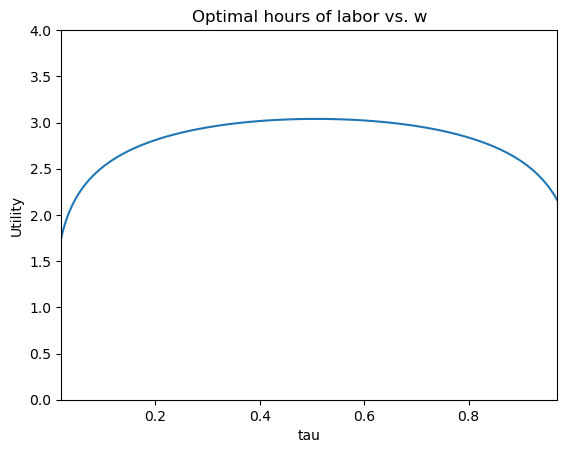

In [57]:
plt.plot(tau_values, optimal_utility_values)
plt.xlabel('tau')
plt.ylabel('Utility')
plt.title('Optimal hours of labor vs. w')
plt.xlim(0.02,0.97)
plt.ylim(0,4)
plt.show()

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [58]:
optimumvalues= max( (v, i) for i, v in enumerate(optimal_utility_values) )
optimumvalues[1]


507

In [59]:
optimumvalues[0]

3.0393046768154868

In [60]:
tau_values[optimumvalues[1]]


0.5075075075074925

When the tax is equal to 50.8% the utility is maximized

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

When sigma=rho=1 the CES function converges to Coop-Douglas. So labor supply does not depend on G. 

In [61]:
# Define the objective function with the budget constraint substituted in
def objective_function_CES(L,tau,sigma,rho,epsilon):
    C = kappa + (1 - tau) * w * L
    G = tau*w*L
    utility = (((alpha*C**((sigma-1)/sigma) + (1-alpha)*G**((sigma-1)/sigma))**(sigma/(sigma-1)))**(1-rho)-1)/(1-rho)-nu*L**(1+epsilon)/(1+epsilon)
    return -utility  # Negative sign for maximization

In [62]:
w=1
tau = 0.5075
sigma=1.001
rho=1.001
epsilon=1
optimal_L_1 = minimize(objective_function_CES, x0=12,args=(tau,sigma,rho,epsilon,), bounds=bounds).x[0]
sigma=1.5
rho=1.5
epsilon=1
optimal_L_2 = minimize(objective_function_CES, x0=12,args=(tau,sigma,rho,epsilon,), bounds=bounds).x[0]
print("Optimal hours of labor set 1:", optimal_L_1)
print("Optimal hours of labor set 2:", optimal_L_2)

Optimal hours of labor set 1: 22.118456068587847
Optimal hours of labor set 2: 13.355002419916632


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

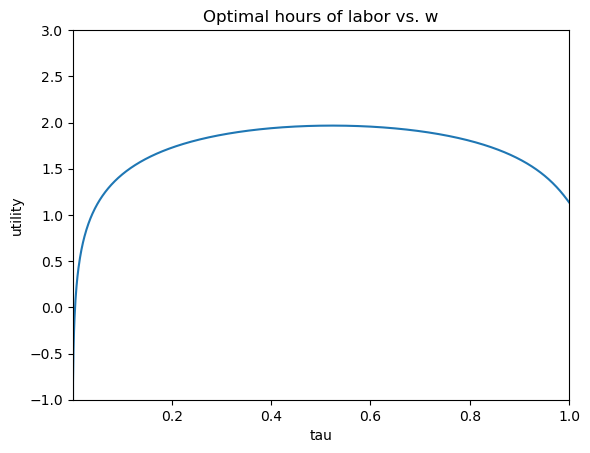

In [63]:
# write your code here  
# Define the bounds for the variable L
bounds = [(1e-12, 24)]
tau_values = np.linspace(1e-12, 1-1e-12, 1000)  # Generate 50 values of w from 1 to 5
optimal_utility_values_1 = []

sigma=1.001
rho=1.001
epsilon=1
# Loop over different values of w
for tau in tau_values:
    solution = minimize(objective_function_CES, x0=12, args=(tau,sigma,rho,epsilon,), bounds=bounds)
    optimal_utility_1 = -solution.fun
    optimal_utility_values_1.append(optimal_utility_1)
    
# Plot the results
plt.plot(tau_values, optimal_utility_values_1)
plt.xlabel('tau')
plt.ylabel('utility')
plt.xlim(0.001,1)
plt.ylim(-1,3)
plt.title('Optimal hours of labor vs. w')
plt.show()

In [64]:
optimumvalues_1= max( (v, i) for i, v in enumerate(optimal_utility_values_1) )
print(optimumvalues_1[1])
print(optimumvalues_1[0])
print(tau_values[optimumvalues_1[1]])

522
1.9667318772294045
0.5225225225224776


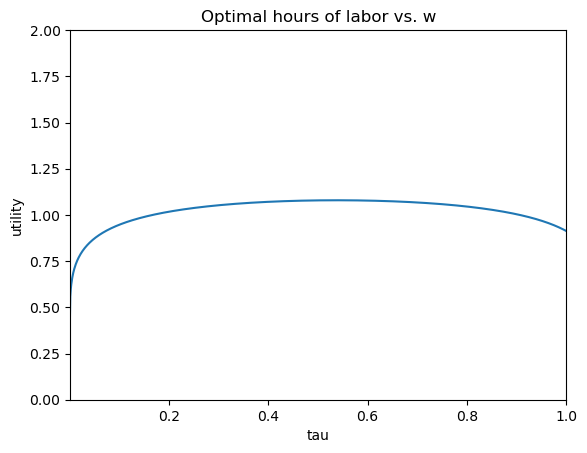

In [65]:
sigma=1.5
rho=1.5
epsilon=1
optimal_utility_values_2 = []
# Loop over different values of w
for tau in tau_values:
    solution = minimize(objective_function_CES, x0=12, args=(tau,sigma,rho,epsilon,), bounds=bounds)
    optimal_utility_2 = -solution.fun
    optimal_utility_values_2.append(optimal_utility_2)
    
# Plot the results
plt.plot(tau_values, optimal_utility_values_2)
plt.xlabel('tau')
plt.ylabel('utility')
plt.xlim(0.001,1)
plt.ylim(0,2)
plt.title('Optimal hours of labor vs. w')
plt.show()

In [66]:
optimumvalues_2= max( (v, i) for i, v in enumerate(optimal_utility_values_2) )
print(optimumvalues_2[1])
print(optimumvalues_2[0])
print(tau_values[optimumvalues_2[1]])

537
1.079301560916691
0.5375375375374625


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [67]:
# write your code here

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [68]:
# write your code here 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [69]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [70]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [71]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [72]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [74]:
griewank(np.zeros(2))


np.random.seed(2023)


print(f'min(x_k) = {np.min(x_k):.2f}, max(x_k) = {np.max(x_k):.2f}')



def refined_global_optimizer(tol, K_warmup, K_max):
   fopt = np.inf
   x_star = np.nan


   for k, K_max in enumerate(range(K_max)):
       x_k = -600 + 1200*np.random.uniform(size=2)


       if k >= K_warmup:
           chi_k = 0.50 * 2 / (1 + np.exp((k - K_warmup) / 100))
           x_k0 = chi_k * x_k + (1 - chi_k) * x_star
       else:
           x_k0 = x_k


       result = minimize(griewank, x_k0, method='BFGS', tol=1e-8)
     


       if fopt is None or result.fun < fopt:
           fopt = result.fun
           x_star = result.x


       if fopt < tol:
           break


       print(f"Iteration {k}: x_k0 = {x_k0}, f(x_k0) = {result.fun}")


   return x_star


# Set the settings


K_warmup = 10
K_max = 1000


# Run the refined global optimizer
fopt = refined_global_optimizer(tolerance,K_warmup, K_max)


print("\nBest Solution:")
print(f"x_star = {fopt}, f(x_star) = {griewank(fopt)}")


import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(xs[:200, 0], label='$x^{k0}_1$')
plt.plot(xs[:200, 1], label='$x^{k0}_2$')
plt.xlabel('Iteration counter $k$')
plt.ylabel('Effective initial guess $x^{k0}$')
plt.title('Effective Initial Guesses vs Iteration Counter for First 200 Iterations')
plt.legend()
plt.grid(True)
plt.show()


min(x_k) = -213.61, max(x_k) = 468.51


NameError: name 'tolerance' is not defined

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [ ]:
# write your code here